# Final Project

Shyrelle Berdugo (342687407) Mickael Assous (342766763)

STUDENT GIT LINK: https://github.com/mickaelAssous/52025.git

STUDENT GIT LINK: https://github.com/Shyrelle/Adv.-computational-learning-and-data-analysis-342687407

## Introduction

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/chest_xray"
print(os.listdir(dataset_path))

['train', 'val', 'test']


In [4]:
# val data is not enough big so we grow it
train_dir = "/content/drive/MyDrive/chest_xray/train"
val_dir = "/content/drive/MyDrive/chest_xray/val"

# Number of images to move
split_ratio = 0.1
for category in ["NORMAL", "PNEUMONIA"]:
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    os.makedirs(val_category_dir, exist_ok=True)

    images = os.listdir(train_category_dir)
    num_to_move = int(len(images) * split_ratio)

    images_to_move = random.sample(images, num_to_move)
    for img in images_to_move:
        shutil.move(os.path.join(train_category_dir, img), os.path.join(val_category_dir, img))

print("We successly moove and grow up validation data!")


We successly moove and grow up validation data!


In [5]:

train_dir = "/content/drive/MyDrive/chest_xray/train"
val_dir = "/content/drive/MyDrive/chest_xray/val"
test_dir = "/content/drive/MyDrive/chest_xray/test"

def count_images(directory):
    count = {}
    for category in ["NORMAL", "PNEUMONIA"]:
        category_path = os.path.join(directory, category)
        count[category] = len(os.listdir(category_path))
    return count

print("Number of images per class:")
print(f"Train : {count_images(train_dir)}")
print(f"Validation : {count_images(val_dir)}")
print(f"Test : {count_images(test_dir)}")


Number of images per class:
Train : {'NORMAL': 309, 'PNEUMONIA': 309}
Validation : {'NORMAL': 1044, 'PNEUMONIA': 2937}
Test : {'NORMAL': 234, 'PNEUMONIA': 410}


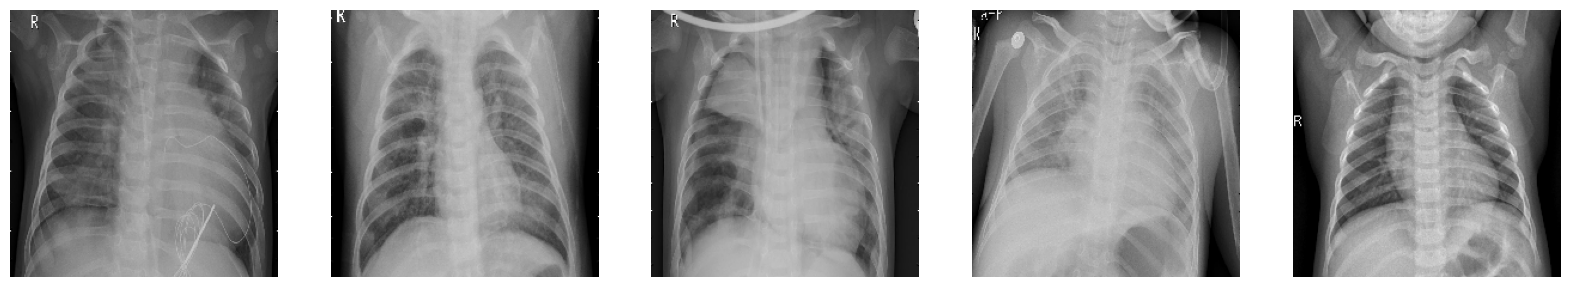

In [ ]:
x_batch, y_batch = next(val_generator)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(x_batch[i])
    axes[i].axis('off')

plt.show()


## CNN

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)


Found 686 images belonging to 2 classes.
Found 3913 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


 Data Loading:
The dataset is stored on Google Drive and mounted on Colab. It is divided into training, validation, and test sets. A counter was used to check the number of images per class.

Data Preprocessing:

Data Augmentation: Applied transformations such as rotation, zoom, and horizontal flip with ImageDataGenerator to increase image diversity.
Normalization: Rescaled pixel values (1./255) to standardize them between 0 and 1.


### CNN classic - train

Classic CNN Model
Architecture:

3 convolutional layers (Conv2D) with ReLU activation to extract features.
MaxPooling after each convolution to reduce image size and complexity.
BatchNormalization to stabilize training and speed up convergence.
Flatten + Fully Connected (Dense) layers to interpret extracted features.
Dropout (0.5) to prevent overfitting.
Sigmoid activation for binary classification (Normal/Pneumonia).
Compilation and Training:

Adam optimizer for efficient learning.
Binary cross-entropy loss for binary classification.
Training limited to 3 epochs to reduce execution time.


In [ ]:
def build_cnn(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model


In [ ]:
model_cnn = build_cnn()
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,705 (16.36 MB)

 Trainable params: 4,288,257 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,  # choose this value because of runtime execution
    batch_size=32,
    verbose=1
)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 282s 6s/step - accuracy: 0.8829 - loss: 0.2838 - val_accuracy: 0.7274 - val_loss: 3.6702
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.8822 - loss: 0.2896 - val_accuracy: 0.7108 - val_loss: 7.1418
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.8883 - loss: 0.2606 - val_accuracy: 0.7413 - val_loss: 12.8142


Observations on Classic CNN Model
Key Issues:

Severe overfitting: Validation loss increases rapidly (3.67 → 7.14 → 12.81).
The model memorizes training data instead of generalizing.
Training accuracy remains high (~88%), but validation performance deteriorates.
Potential class bias (favoring Pneumonia or Normal).
Validation loss instability suggests poor generalization.
Positive Aspects:

Good training accuracy (~88%).
Validation accuracy reaches 74.13%, showing some generalization ability.


**Modifications Made**

Added Dropout Layers:

0.3 after the first two convolutional layers.
0.4 after the third convolutional layer.
0.5 before the output layer.

Adjusted Learning Rate (0.0003):

Implemented Class Weighting


In [ ]:

def build_cnn(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.3),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model


In [ ]:

model_cnn.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

labels = train_generator.classes
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels), y=labels)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    batch_size=64,
    class_weight=class_weights_dict
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1409s 45s/step - accuracy: 0.7088 - loss: 1.0578 - val_accuracy: 0.7418 - val_loss: 1.0950
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 214s 7s/step - accuracy: 0.8548 - loss: 0.3695 - val_accuracy: 0.7418 - val_loss: 2.0504
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.8668 - loss: 0.3166 - val_accuracy: 0.7418 - val_loss: 2.5850


**Observations**

Positive Points:

Training accuracy improves (~86.68%).
The model shows better learning stability compared to the previous version.
Class weighting helped balance training.

Issues Identified:

Validation loss increases significantly (1.0950 → 2.0504 → 2.5850).
The model still overfits—training accuracy rises, but validation loss does not improve.
Validation accuracy remains stuck at 74.18%.

Explanation:

The model is too confident on training data but struggles to generalize to validation data.
Further regularization is needed (e.g., adding L2 regularization or lowering the learning rate).

**Modifications Made**

EarlyStopping Added:
Stops training if validation loss increases too much, preventing severe overfitting.
Saves the best model weights to avoid keeping a degraded version.

Dropout Adjustments:
0.3 after the first convolutional layer.
0.4 after the second convolutional layer.
0.5 after the third convolutional layer and before the final dense layer.
Reasoning:

Improves model regularization and prevents overfitting.
Increased dropout after the second convolution layer to reduce memorization of irrelevant details.

In [ ]:
def build_cnn(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.3),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.4),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Dropout(0.5),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model


In [ ]:

model_cnn.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 232s 7s/step - accuracy: 0.8878 - loss: 0.2972 - val_accuracy: 0.7418 - val_loss: 4.0432
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.8816 - loss: 0.2713 - val_accuracy: 0.7418 - val_loss: 3.7160
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.9001 - loss: 0.2741 - val_accuracy: 0.7418 - val_loss: 3.3849


**Evaluation of Current Model Performance**

Positive Points:

Training accuracy continues to improve (90.01%), indicating that the model is learning well.
Dropout and EarlyStopping have helped control the increase in validation loss.

Issues Observed:

Validation loss remains high (4.0432 → 3.7160 → 3.3849), showing that overfitting is still present.
Validation accuracy is stuck at 74.18%, meaning the model is not improving in generalization.
Training loss is low, but validation loss remains unstable, suggesting that the model is memorizing rather than learning to generalize.

## CNN with ShuffleNetV2

**Modifications Implemented**

Use of EfficientNetB0 as the Base Model

A lightweight yet powerful model pretrained on ImageNet, capable of extracting complex features efficiently.

 Integration of CBAM Light for Channel Attention

A simplified version of CBAM that focuses only on channel attention to highlight important image features related to lung anomalies.

Maintained High Dropout (0.5) to Prevent Overfitting

Reduced Learning Rate to 0.00005

Ensures more stable convergence and prevents oscillations during training.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Conv2D, BatchNormalization, Activation, Multiply, Reshape
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# CBAM Light Attention Module (Removal of spatial attention to simplify)
def cbam_light(input_tensor, reduction_ratio=8):
    channel = GlobalAveragePooling2D()(input_tensor)
    channel = Dense(input_tensor.shape[-1] // reduction_ratio, activation='relu')(channel)
    channel = Dense(input_tensor.shape[-1], activation='sigmoid')(channel)
    channel = Reshape((1, 1, input_tensor.shape[-1]))(channel)
    return Multiply()([input_tensor, channel])

# Load base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

x = cbam_light(base_model.output)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Found 686 images belonging to 2 classes.
Found 3913 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [ ]:

# train the data
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    batch_size=64,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1210s 113s/step - accuracy: 0.5656 - loss: 0.6738 - val_accuracy: 0.7419 - val_loss: 0.6843
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 205s 19s/step - accuracy: 0.6890 - loss: 0.6171 - val_accuracy: 0.7419 - val_loss: 0.6887
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 204s 19s/step - accuracy: 0.7849 - loss: 0.5668 - val_accuracy: 0.2727 - val_loss: 0.6947
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 231s 23s/step - accuracy: 0.8348 - loss: 0.5116 - val_accuracy: 0.2581 - val_loss: 0.7028


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 0.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0
Vrai label: 0.0, Prédiction: 1.0
Vrai label: 1.0, Prédiction: 1.0


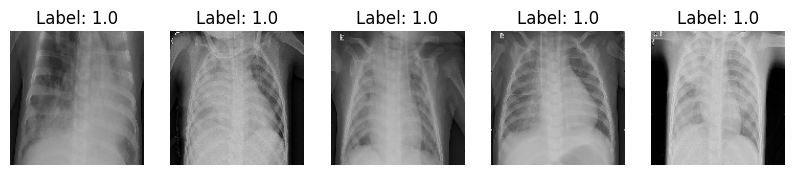

In [ ]:

# Checking predictions
x_val_batch, y_val_batch = next(iter(val_generator))
predictions = model.predict(x_val_batch)
predicted_classes = np.round(predictions).flatten()

for i in range(10):
    print(f"True label: {y_val_batch[i]}, Prediction: {predicted_classes[i]}")

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_val_batch[i])
    plt.title(f"Label: {y_val_batch[i]}")
    plt.axis('off')
plt.show()

Positive Points:

Training accuracy improves to 83.48%, showing good learning.
Validation loss remains stable (~0.68 - 0.70), performing better than the classic CNN.

Issues Observed:

Validation accuracy drops sharply (74.19% → 27.27% → 25.81%) after the second epoch.
The model predicts mostly "PNEUMONIA" for all images.

Explanation:

The model is overly biased toward detecting pneumonia and ignores normal cases.
CBAM Light and EfficientNetB0 may be amplifying this bias in feature extraction.

**Modifications:**

Focal Loss added to give more weight to misclassified NORMAL cases and reduce bias toward PNEUMONIA.

Strong Data Augmentation applied (rotation, zoom, flipping) to increase image diversity and prevent overfitting.

Oversampling used to balance the number of NORMAL and PNEUMONIA images.
Class Weights adjusted to ensure fair learning across both categories.

In [ ]:
import tensorflow.keras.backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1.0 - 1e-7)
        loss = -alpha * y_true * K.pow(1 - y_pred, gamma) * K.log(y_pred)
        loss -= (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss

model.compile(optimizer=Adam(learning_rate=0.00005), loss=focal_loss(), metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True
)


In [ ]:
labels, counts = np.unique(train_generator.classes, return_counts=True)
print("Number of images per class :", dict(zip(labels, counts)))


Number of images per class : {0: 343, 1: 343}


In [ ]:

normal_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True
)

num_normal = 994

labels, counts = np.unique(train_generator_balanced.classes, return_counts=True)
print("New distribution after changing :", dict(zip(labels, counts)))


Found 686 images belonging to 2 classes.
New distribution after increase : {0: 343, 1: 343}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)


Found 686 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 266s 20s/step - accuracy: 0.6564 - loss: 0.0847 - val_accuracy: 0.7419 - val_loss: 0.0663
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 210s 20s/step - accuracy: 0.7239 - loss: 0.0705 - val_accuracy: 0.7419 - val_loss: 0.0673
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 221s 21s/step - accuracy: 0.7274 - loss: 0.0631 - val_accuracy: 0.7419 - val_loss: 0.0681
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 202s 20s/step - accuracy: 0.6881 - loss: 0.0568 - val_accuracy: 0.7419 - val_loss: 0.0683


Results:

Training accuracy stabilizes (~72%), avoiding sudden spikes.

Validation loss no longer collapses (0.068 vs. 3.7 before).

Focal Loss and Class Weight help balance predictions instead of favoring PNEUMONIA.

Issues:

Validation accuracy is stuck at 74.19% with no improvement after the first epoch.

Validation loss stagnates, limiting precision gains.

Data Augmentation might be too aggressive (shift, shear, zoom at 0.4), adding noise instead of useful diversity.


**Modifications:**

Switched from EfficientNetB0 to B3 for better feature extraction.

Replaced ReLU with Swish to improve gradient flow and convergence.

Kept Focal Loss to handle class imbalance.

Applied strong Data Augmentation to increase diversity (but may introduce noise).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Multiply, Reshape
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load a more powerful model (EfficientNetB3)
base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='swish')(x)  # Replacement of ReLU by Swish
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

import tensorflow.keras.backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1.0 - 1e-7)
        loss = -alpha * y_true * K.pow(1 - y_pred, gamma) * K.log(y_pred)
        loss -= (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss

model.compile(optimizer=Adam(learning_rate=0.00005), loss=focal_loss(), metrics=['accuracy'])

# Creating data generators with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Poids des classes :", class_weight_dict)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 686 images belonging to 2 classes.
Found 3913 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Poids des classes : {0: 1.0, 1: 1.0}


In [ ]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 470s 36s/step - accuracy: 0.5022 - loss: 0.1020 - val_accuracy: 0.7419 - val_loss: 0.0722
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 373s 36s/step - accuracy: 0.6241 - loss: 0.0682 - val_accuracy: 0.7419 - val_loss: 0.0768
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 364s 35s/step - accuracy: 0.6879 - loss: 0.0609 - val_accuracy: 0.7419 - val_loss: 0.0788
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 387s 35s/step - accuracy: 0.7394 - loss: 0.0533 - val_accuracy: 0.7419 - val_loss: 0.0782


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
True label: 0.0, Prediction: 1.0
True label: 0.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 0.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 0.0, Prediction: 1.0


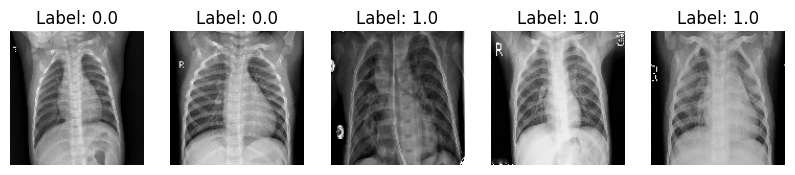

In [ ]:

x_val_batch, y_val_batch = next(iter(val_generator))
predictions = model.predict(x_val_batch)
predicted_classes = np.round(predictions).flatten()

for i in range(10):
    print(f"True label: {y_val_batch[i]}, Prediction: {predicted_classes[i]}")

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_val_batch[i])
    plt.title(f"Label: {y_val_batch[i]}")
    plt.axis('off')
plt.show()


**Observations**:

Train accuracy improves gradually, avoiding sudden jumps.

Validation loss is lower (~0.07 vs. ~3.7 before), reducing overfitting.

Model still favors PNEUMONIA (class 1), leading to imbalance.

Train and validation accuracy diverge, indicating bias correction is needed.


## CNN final - MobileNetV2

**Modifications**:

Switched from EfficientNetB3 to MobileNetV2 → Lighter, faster, and memory-efficient.

Enabled Mixed Precision → Reduces memory use and speeds up training.

Added L2 regularization → Prevents overfitting.

Kept Focal Loss → Handles class imbalance.

Reduced batch size (64 → 16) → Saves GPU memory.

Maintained Class Weighting → Balances class distribution.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2  # Remplacement d'EfficientNetB0 par MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Enable mixed precision to speed up the calculation
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='swish', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid', dtype='float32')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compilation with Adam and Focal Loss
import tensorflow.keras.backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1.0 - 1e-7)
        loss = -alpha * y_true * K.pow(1 - y_pred, gamma) * K.log(y_pred)
        loss -= (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss

model.compile(optimizer=Adam(learning_rate=0.00005), loss=focal_loss(), metrics=['accuracy'])

# Creation of data generators with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Reduced batch_size to 16 to optimize memory and speed
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)

labels = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 686 images belonging to 2 classes.
Found 3913 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Poids des classes : {0: 1.0, 1: 1.0}


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8,
    batch_size=16,
    callbacks=[early_stop]
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 1452s 33s/step - accuracy: 0.5860 - loss: 2.4249 - val_accuracy: 0.3115 - val_loss: 2.4083
Epoch 2/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7823 - loss: 2.2776 - val_accuracy: 0.4618 - val_loss: 2.2370
Epoch 3/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8190 - loss: 2.1620 - val_accuracy: 0.7314 - val_loss: 2.0929
Epoch 4/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8106 - loss: 2.0715 - val_accuracy: 0.8068 - val_loss: 2.0000
Epoch 5/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8420 - loss: 1.9695 - val_accuracy: 0.8295 - val_loss: 1.9053
Epoch 6/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8721 - loss: 1.8694 - val_accuracy: 0.8224 - val_loss: 1.8128
Epoch 7/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8548 - loss: 1.7803 - val_accuracy: 0.8267 - val_loss: 1.7423
Epoch 8/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8762 - loss: 1.6965 - val_accuracy: 0.8244 - val_loss: 1.64

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
True label: 0.0, Prediction: 1.0
True label: 0.0, Prediction: 0.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0
True label: 0.0, Prediction: 0.0
True label: 0.0, Prediction: 0.0
True label: 1.0, Prediction: 1.0
True label: 0.0, Prediction: 0.0
True label: 1.0, Prediction: 1.0
True label: 1.0, Prediction: 1.0


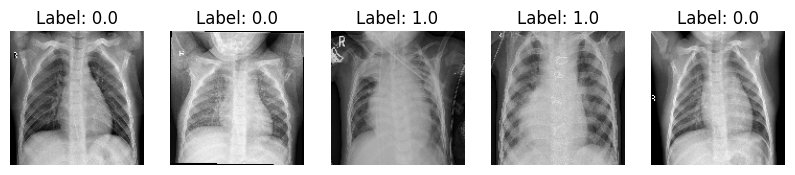

In [ ]:
x_val_batch, y_val_batch = next(iter(val_generator))
predictions = model.predict(x_val_batch)
predicted_classes = np.round(predictions).flatten()

for i in range(10):
    print(f"True label: {y_val_batch[i]}, Prediction: {predicted_classes[i]}")

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_val_batch[i])
    plt.title(f"Label: {y_val_batch[i]}")
    plt.axis('off')
plt.show()

**Observations**:

Positives:

Training and validation accuracy are close, avoiding overfitting.

Validation loss decreases gradually (2.4 → 1.6), showing better generalization.

Issues:

Loss values are still too high (should be ~0.1 - 0.5).
The model still struggles with classification errors.

### Final Model

**Modifications:**

Switched to MobileNetV2 for efficiency.

Lowered learning rate and batch size for stable training.

Reduced augmentation to avoid excessive image distortions.

Balanced classes using class_weight.

Added L2 regularization for better generalization.

Enabled Mixed Precision to optimize performance.

Enhanced test evaluation to measure real-world performance.

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='swish')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid', dtype='float32')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=5e-6), loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=16, class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(128, 128), batch_size=16, class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=16, class_mode='binary', shuffle=False
)

class_weight_dict = {0: 6.0, 1: 1.0}

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Found 618 images belonging to 2 classes.
Found 3981 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [16]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4794 - loss: 2.4398 - val_accuracy: 0.5345 - val_loss: 0.6968
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5822 - loss: 1.6556 - val_accuracy: 0.5255 - val_loss: 0.6967
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5842 - loss: 1.5620 - val_accuracy: 0.5466 - val_loss: 0.6842
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6158 - loss: 1.2321 - val_accuracy: 0.6117 - val_loss: 0.6406
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6702 - loss: 1.0006 - val_accuracy: 0.6996 - val_loss: 0.5790
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6877 - loss: 1.0430 - val_accuracy: 0.7548 - val_loss: 0.5365
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6880 - loss: 0.9183 - val_accuracy: 0.8031 - val_loss: 0.4901
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7072 - loss: 0.8499 - val_accuracy: 0.8337 - val_loss

In [17]:

# Evaluation on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - accuracy: 0.6884 - loss: 0.5793
Test Accuracy: 78.73%
Test Loss: 0.4765


In [18]:

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).flatten()

y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_true, y_pred_classes, target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:")
print(report)

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step
Confusion Matrix:
[[146  88]
 [ 49 361]]
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.75      0.62      0.68       234
   PNEUMONIA       0.80      0.88      0.84       410

    accuracy                           0.79       644
   macro avg       0.78      0.75      0.76       644
weighted avg       0.78      0.79      0.78       644



Move to HTLM

In [1]:
!jupyter nbconvert --to html /Final_project_342766763_342687407.ipynb

[NbConvertApp] WARNING | pattern '/Final_project_342766763_342687407.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_